In [2]:
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
import numpy as np

In [3]:
sector = 480

label_set_i = np.zeros(sector*36)
label_set_j = np.zeros(sector*36)
label_set_k = np.zeros(sector*36)

for i in range(0,3):
    label_set_i[sector*i*2 : sector*(2*i+2)] = i
    label_set_i[sector*6 + sector*i*2 :sector*6 + sector*(2*i+2)] = i
    
for i in range(0,3):
    label_set_j[sector*12 + sector*2*i : sector*12 + sector*(2*i+2)] = i+3
    label_set_j[sector*18 + sector*2*i : sector*18 +sector*(2*i+2)] = i+3
    
for i in range(0,3):
    label_set_k[sector*24 + sector*2*i : sector*24 + sector*(2*i+2)] = i+6
    label_set_k[sector*30 + sector*2*i : sector*30 + sector*(2*i+2)] = i+6

label_set=np.zeros((sector*36))
label_set[0:sector*12]=label_set_i[0:sector*12]
label_set[sector*12:sector*24]=label_set_j[sector*12:sector*24]
label_set[sector*24:sector*36]=label_set_k[sector*24:sector*36]

    
print(label_set.shape)

(17280,)


In [4]:
print(label_set[0])
print(label_set[8000])
print(label_set[9000])
print(label_set[17100])

0.0
5.0
3.0
8.0


In [5]:
from sklearn.model_selection import train_test_split
X = np.load('X_4_14_1_train.npy')
X = np.asarray(X, np.float32)
#X = tf.convert_to_tensor(X, np.float32)
Y = label_set

print(X.shape)
print(Y.shape)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.1) 
#Use 10 percent of the data to validate the model

(17280, 4, 2, 11)
(17280,)


In [6]:
# construct a CNN, Keras used.
model = models.Sequential()
model.add(layers.Conv2D(11, kernel_size = 1, strides=(1, 1), padding='valid',input_shape = (4,2,11),data_format='channels_first', 
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(layers.Conv2D(22, kernel_size = 1, strides=(1, 1), padding='valid',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(layers.Conv2D(44, kernel_size = 1, strides=(1, 1), padding='valid',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_last'))
model.add(layers.Flatten())
model.add(layers.Dense(36, activation='softmax'))
model.add(layers.Dense(9, activation='softmax'))

In [7]:
#optimizer is Adam, default hyperparameter used. And the CNN architecture can be seen.
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 2, 11)         55        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 2, 11)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 2, 22)         264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 2, 22)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 2, 44)         1012      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 2, 44)         0         
_________________________________________________________________
flatten (Flatten)            (None, 968)               0

In [8]:
# Train the model in 50 epochs.
history = model.fit(X_train, Y_train, epochs=100, 
                    validation_data=(X_validation, Y_validation))

Train on 15552 samples, validate on 1728 samples
Epoch 1/100
15552/15552 [==============================] - 3s 174us/sample - loss: 2.2033 - accuracy: 0.1118 - val_loss: 2.1974 - val_accuracy: 0.1117
Epoch 2/100
15552/15552 [==============================] - 1s 76us/sample - loss: 2.1977 - accuracy: 0.1058 - val_loss: 2.1973 - val_accuracy: 0.1128
Epoch 3/100
15552/15552 [==============================] - 1s 78us/sample - loss: 2.1975 - accuracy: 0.1123 - val_loss: 2.1974 - val_accuracy: 0.1111
Epoch 4/100
15552/15552 [==============================] - 1s 78us/sample - loss: 2.1977 - accuracy: 0.1069 - val_loss: 2.1976 - val_accuracy: 0.1065
Epoch 5/100
15552/15552 [==============================] - 1s 79us/sample - loss: 2.1977 - accuracy: 0.1098 - val_loss: 2.1976 - val_accuracy: 0.1082
Epoch 6/100
15552/15552 [==============================] - 1s 81us/sample - loss: 2.1976 - accuracy: 0.1063 - val_loss: 2.1973 - val_accuracy: 0.1128
Epoch 7/100
15552/15552 [=========================

Epoch 55/100
15552/15552 [==============================] - 1s 77us/sample - loss: 2.1976 - accuracy: 0.1068 - val_loss: 2.1973 - val_accuracy: 0.1128
Epoch 56/100
15552/15552 [==============================] - 1s 76us/sample - loss: 2.1976 - accuracy: 0.1067 - val_loss: 2.1977 - val_accuracy: 0.1071
Epoch 57/100
15552/15552 [==============================] - 1s 76us/sample - loss: 2.1976 - accuracy: 0.1089 - val_loss: 2.1977 - val_accuracy: 0.1082
Epoch 58/100
15552/15552 [==============================] - 1s 76us/sample - loss: 2.1976 - accuracy: 0.1088 - val_loss: 2.1975 - val_accuracy: 0.1082
Epoch 59/100
15552/15552 [==============================] - 1s 78us/sample - loss: 2.1976 - accuracy: 0.1109 - val_loss: 2.1974 - val_accuracy: 0.1065
Epoch 60/100
15552/15552 [==============================] - 1s 76us/sample - loss: 2.1976 - accuracy: 0.1113 - val_loss: 2.1972 - val_accuracy: 0.1071
Epoch 61/100
15552/15552 [==============================] - 1s 77us/sample - loss: 2.1976 - ac

In [8]:
# Save the model as a h5 file, accessable when testing.
model.save('CNN_3_30_9.h5')

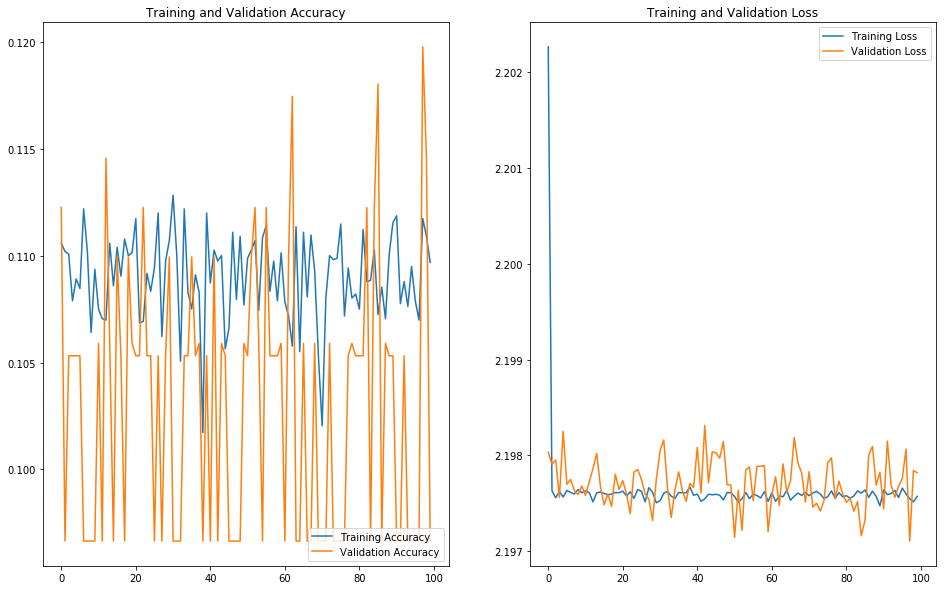

In [10]:
import matplotlib.pyplot as plt
#visualize the train&validation process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
